<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 9. Основы поискового анализа данных (EDA) </h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 9. Основы поискового анализа данных (EDA)</b>

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

## Исследовательский анализ данных (Exploratory Data Analysis - EDA)

#### Скорее, сочетание философии с методологей
* как мы "разбираемся" с данными
* на что в данных мы смотрим
* как мы смотрим
* как интерпретируем увиденное
* не смотря на общие методы, каждый DA вырабатывает свой "стиль"

#### Обычный порядок действий
* получить и ввести датасет
* понять, какая информация содержится в датасете ("семантика")
* понять структуру данных ("синтаксис")
* что делать с пропусками (если они  есть)
* извлечь существенные переменные
* выявить выбросы и аномалии
* сделать и проверить каки-либо предположения о данных
* определить факторное пространство (что на что и как влияет)
* выполнить отчет (если он нужен)

#### Используеются
* графические средства
* отчеты и статистика
* преобразования даннных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from numpy.random import randn
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
import os
import os.path

## Загрузите данные с kaggle

### https://www.kaggle.com/c/house-prices-advanced-regression-techniques

* какие данные у нас есть?
* есть ли у нас описание?
* что от нас требуется?

нам нужны тренировочные и тестовые данные: 
* __train.csv__
* __test.csv__

In [ ]:
data_dir = os.path.join("..", "datasets", "House Prices Advanced Regression Techniques")
train = pd.read_csv( os.path.join( data_dir, "train.csv"))
test = pd.read_csv( os.path.join(data_dir, "test.csv"))

In [3]:
train = pd.read_csv( "train.csv")
test = pd.read_csv( "test.csv")

In [4]:
train.shape

(1460, 81)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## <font color=red>ЗАДАНИЕ</font>

Разделите датафрейм на 2. 
* Создайте копию исходго датафрейма (__для чего?__)
* В первом __X_train__  - должны остаться все переменные, кроме целевой. 
* Во втором __y_train__ - только целевая переменная.


In [7]:
# Ваш код
train_data = train.copy()
X_train = train_data.drop(['SalePrice'],axis=1)
y_train = train_data['SalePrice']


In [8]:
X_train.shape, y_train.shape

((1460, 80), (1460,))

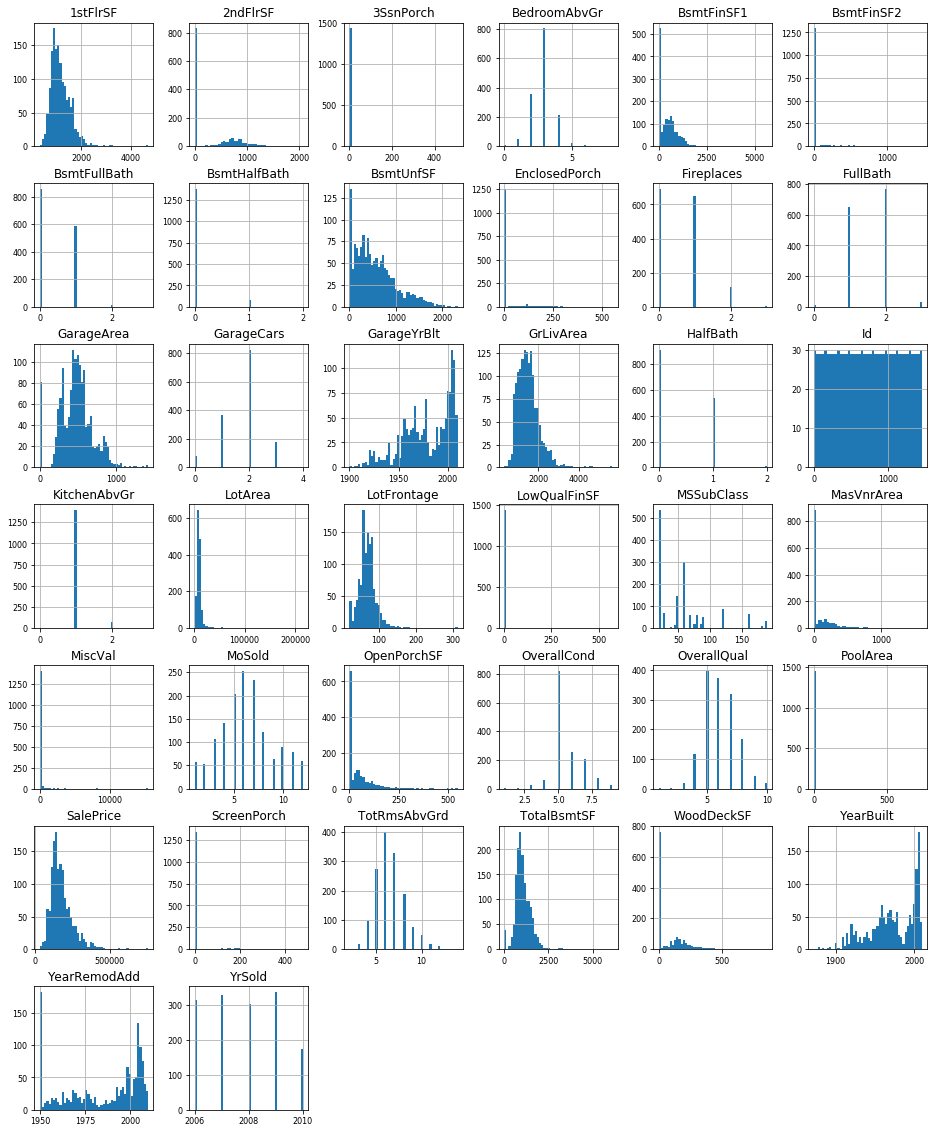

In [9]:
train.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

#### * Какие графики наиболее подозрительны на выбросы и почему?
#### * Постройте графики для каждой из них 

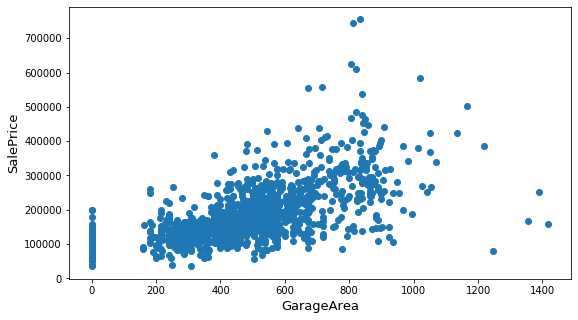

In [11]:
# Ваш код

fig, ax = plt.subplots( figsize=(9,5))
ax.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show();


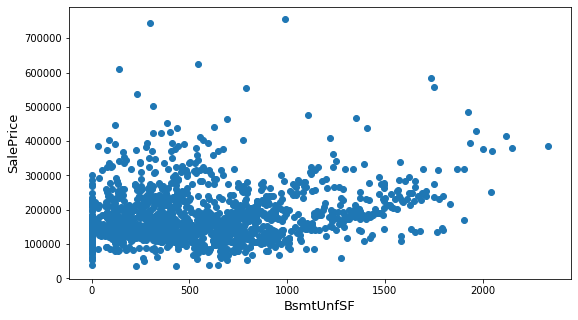

In [13]:
fig, ax = plt.subplots( figsize=(9,5))
ax.scatter(x = train['BsmtUnfSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('BsmtUnfSF', fontsize=13)
plt.show();


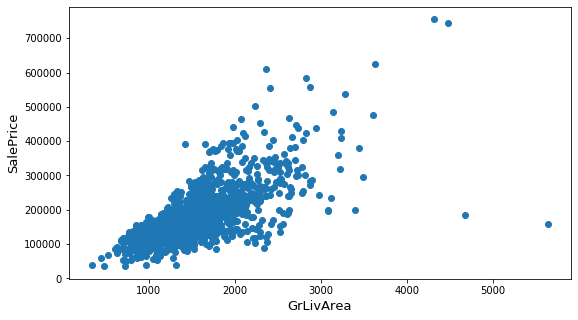

In [10]:
fig, ax = plt.subplots( figsize=(9,5))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show();

### <font color=green>ВОПРОСЫ</font>
* Где здесь выбросы?
* Что с ними можно сделать

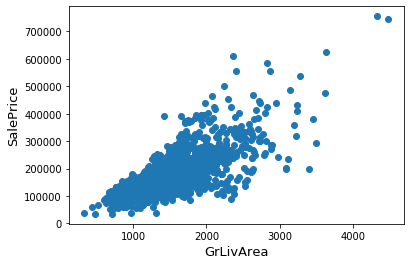

In [14]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


### <font color=green>ВОПРОС.</font> Остались ли ещё выбросы?

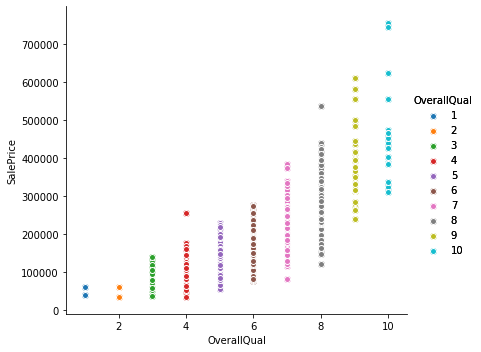

In [15]:
# Modify the graph above by assigning each species an individual color.
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
g=sns.FacetGrid(train[columns], hue="OverallQual", height=5) \
   .map(plt.scatter, "OverallQual", "SalePrice") \
   .add_legend()
g=g.map(plt.scatter, "OverallQual", "SalePrice",edgecolor="w").add_legend();
plt.show()

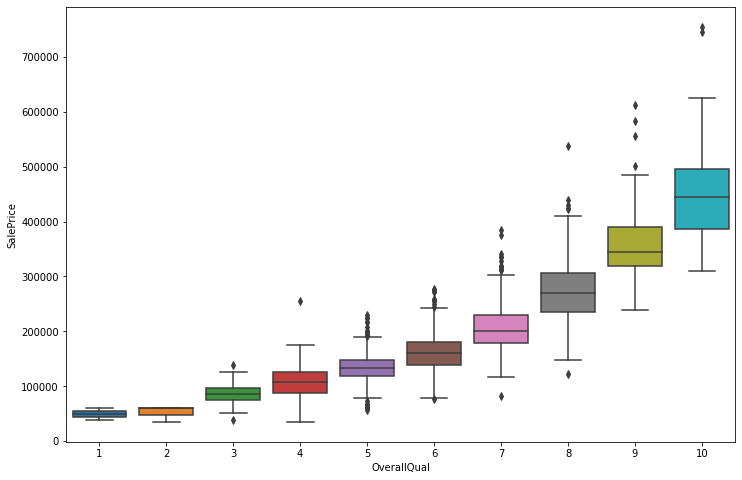

In [16]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)


 mu = 180932.92 and sigma = 79467.79



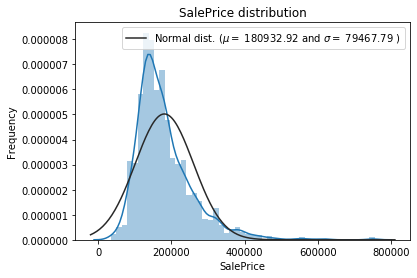

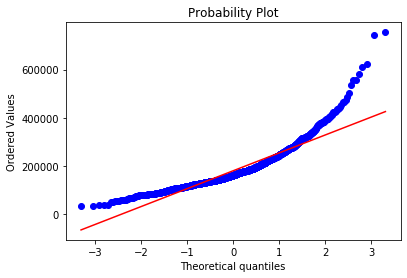

In [17]:
sns.distplot(train['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### <font color=green>ВОПРОС.</font>  Что можно сделать с этим? Остались ли ещё выбросы?

In [18]:
# Что сделано здесь?
train["SalePrice"] = np.log1p(train["SalePrice"])


 mu = 12.02 and sigma = 0.40



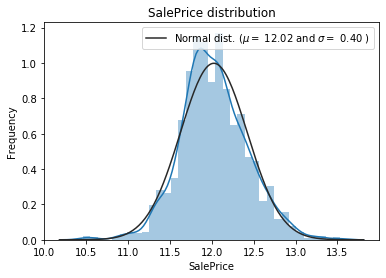

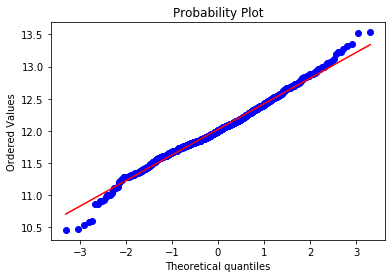

In [19]:
#Check the new distribution 
sns.distplot(train['SalePrice'], fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### <font color=green>ВОПРОС.</font> 
* Появились ли у нас новые кандидаты на выбросы? Обоснуйте.
* Как вернуться к исходным данным? 
* Надо ли возвращаться к ним в данном случае?

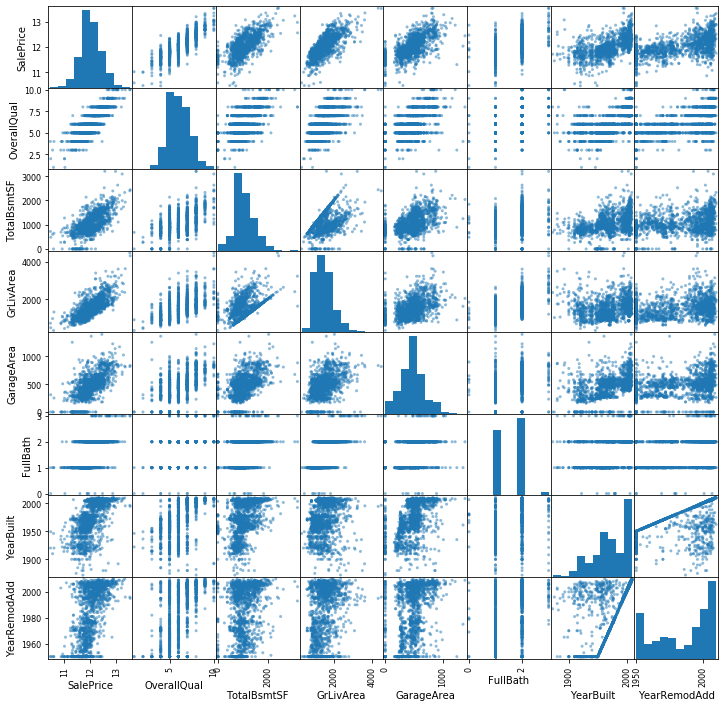

<Figure size 432x288 with 0 Axes>

In [20]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']

pd.plotting.scatter_matrix(train[columns],figsize=(12,12));
plt.figure();

## Очистка и подготовка данных

### Поиск пропущенных данных

In [21]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test), sort=True).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


#### <font color=green>ВОПРОС.</font>  Зачем мы это сделали?

## <font color=red>ЗАДАНИЕ</font>
* Присвойте значения массивов X_train и X_test так, чтобы они соответствовали "прежним" массивам

In [53]:
# Ваш код
train = all_data[:ntrain]
test = all_data[ntrain:]


### Пропущенные данные

#### <font color=green>ВОПРОС.</font>  
* Какие данные имеют пропуски? Составьте список.
* Чем мы будем их заполнять?

In [22]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
PoolQC            99.691464
MiscFeature       96.400411
Alley             93.212204
Fence             80.425094
FireplaceQu       48.680151
LotFrontage       16.660953
GarageQual         5.450806
GarageCond         5.450806
GarageFinish       5.450806
GarageYrBlt        5.450806
GarageType         5.382242
BsmtExposure       2.811107
BsmtCond           2.811107
BsmtQual           2.776826
BsmtFinType2       2.742544
BsmtFinType1       2.708262
MasVnrType         0.822763
MasVnrArea         0.788481
MSZoning           0.137127
BsmtFullBath       0.068564

Text(0.5, 1.0, 'Percent missing data by feature')

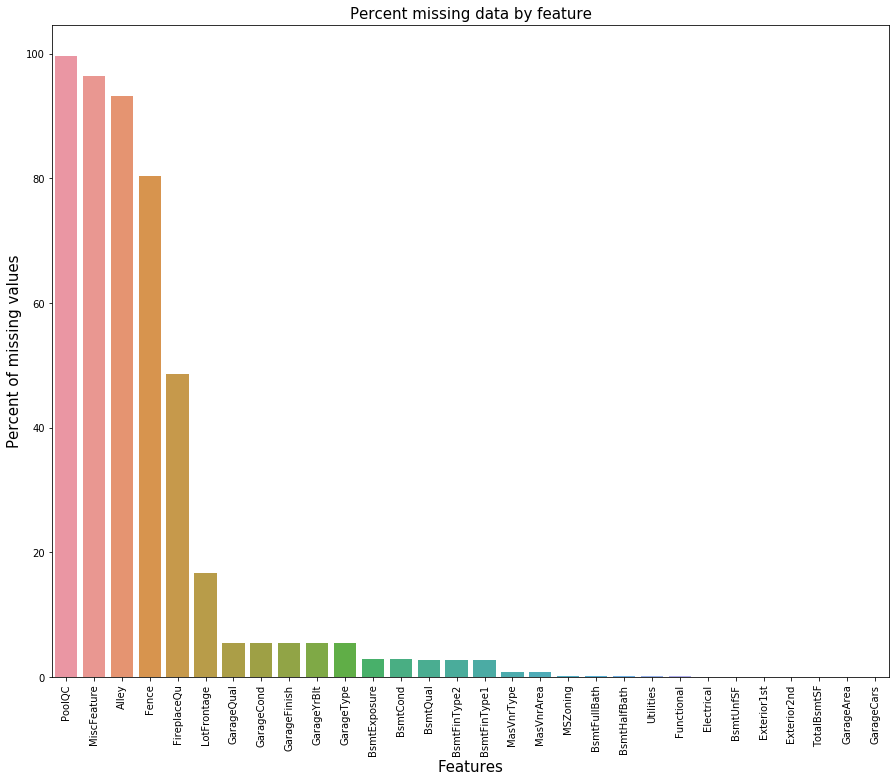

In [23]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### <font color=green>ВОПРОС.</font>  Являются ли значения PoolQC и MiscFeature выбросами?

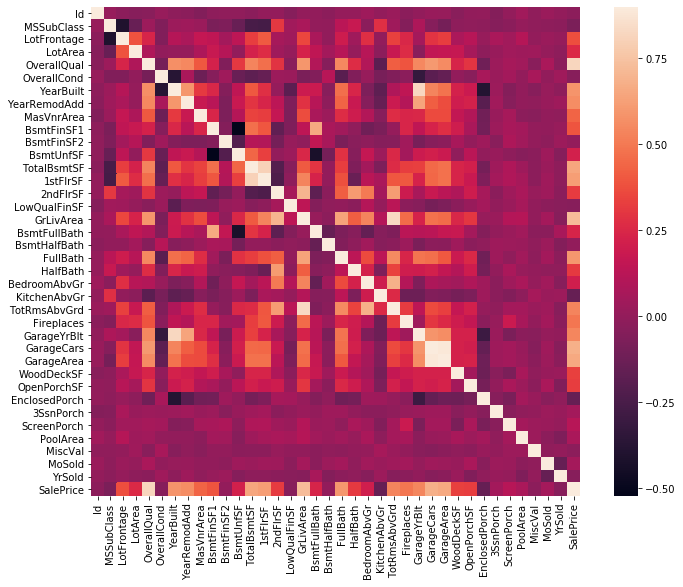

In [24]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### Более удобочитаемый вариант 

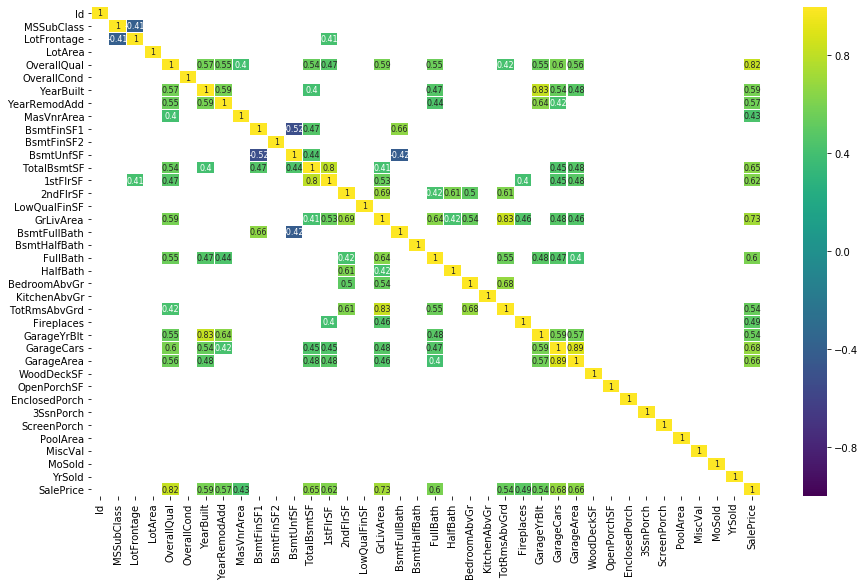

In [25]:
plt.subplots(figsize=(15,9))
sns.heatmap(corrmat[(corrmat >= 0.4) | (corrmat < -0.4)], 
            cmap='viridis',
            vmax=1.0, vmin=-1.0,
            linewidth=0.1,
            annot=True,
            annot_kws={"size":8});

### Фильтрация пропущенных данных

In [26]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [27]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [28]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [29]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [30]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [31]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [33]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [34]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [35]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [36]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [37]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#### <font color=green>ВОПРОС.</font>  Почему? Что делает mode()?

In [38]:
all_data = all_data.drop(['Utilities'], axis=1)

#### <font color=green>ВОПРОС.</font>  Почему?

In [39]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [40]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [41]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [42]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [43]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [44]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### Проверяем, остались ли не заполненные данные?

In [45]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

#### <font color=green>ВОПРОС.</font>  Какие численные значения можно преобразовать в категориальные?

In [46]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


#### <font color=green>ВОПРОС.</font>  Можно ли найти сложные / составные признаки?

In [47]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Признаки со смещенным распределением

In [48]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
MiscVal        21.939672
PoolArea       17.688664
LotArea        13.109495
LowQualFinSF   12.084539
3SsnPorch      11.372080
LandSlope       4.973254
KitchenAbvGr    4.300550
BsmtFinSF2      4.144503
EnclosedPorch   4.002344
ScreenPorch     3.945101

In [49]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 60 skewed numerical features to Box Cox transform


In [50]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 221)


In [51]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       ...
       'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=221)

In [52]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### Рекомендуется посмотреть

https://www.kaggle.com/mjbahmani/machine-learning-workflow-for-house-prices

## <font color="blue">Практическое задание</font>

 www.kaggle.com/c/titanic

Выполните EDA <b>по приведенному ранее образцу</b> для данного датасета. Перед каждой ячейкой должен быть комментарий в строке типа Makrdown, 
говорящей, что выполняется и почему.

In [3]:
data_dir = os.path.join(".", "titanic")
train = pd.read_csv( os.path.join( data_dir, "train.csv"))
test = pd.read_csv( os.path.join(data_dir, "test.csv"))

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Построим гистограммы распределения признаков. Можем видеть, что большинство людей из датасета принадлежали к 3 классу. Данные несбалансированы - количество отрицательных (нулевых) значений таргета больше количества положительных.

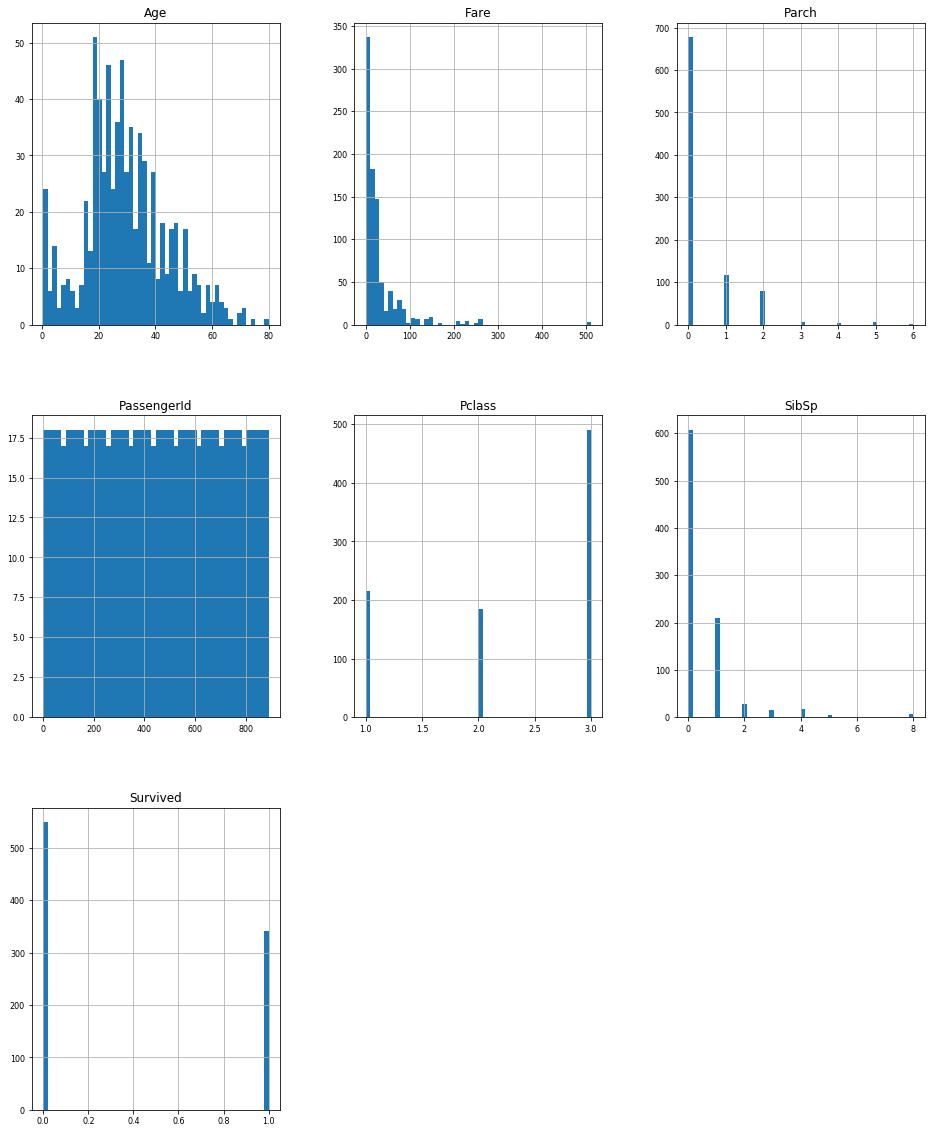

In [5]:
train.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

Из всех наблюдений в  данных, сколько человек выжило?

In [6]:
data_surv = train.groupby("Survived")["PassengerId"].count().reset_index()

In [7]:
data_surv

Survived  PassengerId
0         0          549
1         1          342

Продемонстрируем, сколько процентов от общего количества людей выжило

In [77]:
data_surv['PassengerId']  = data_surv['PassengerId'] / data_surv['PassengerId'].sum() * 100

Порядко 60% погибло и 40% выжило

Text(0.5, 1.0, 'Percent missing data by feature')

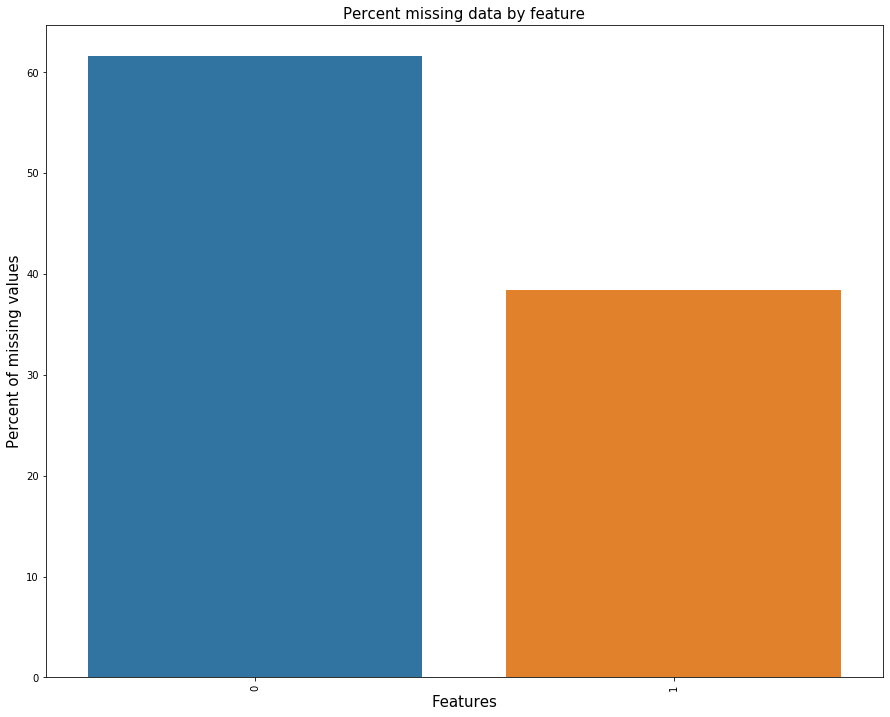

In [82]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=data_surv.set_index('Survived').index, y=data_surv['PassengerId'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [88]:
data_surv.rename(index={1:'Survive', 0:'Die'}, inplace=True)

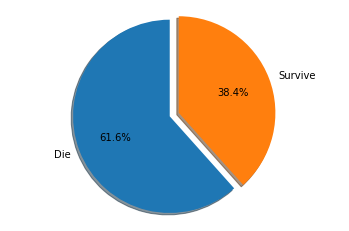

In [89]:
fig1, ax1 = plt.subplots()
ax1.pie(data_surv['PassengerId'], explode = [0,0.1], labels=data_surv['PassengerId'].index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') ;


In [90]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Посмотрим отдельно на распределение стоимости билета. Распределение имеет положителую ассиметрию и похоже на гамма распределение

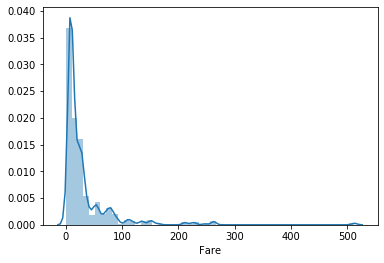

In [93]:
sns.distplot(train.Fare);

Построим диаграммы рассеяния для числовых признаков

/home/vika/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vika/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


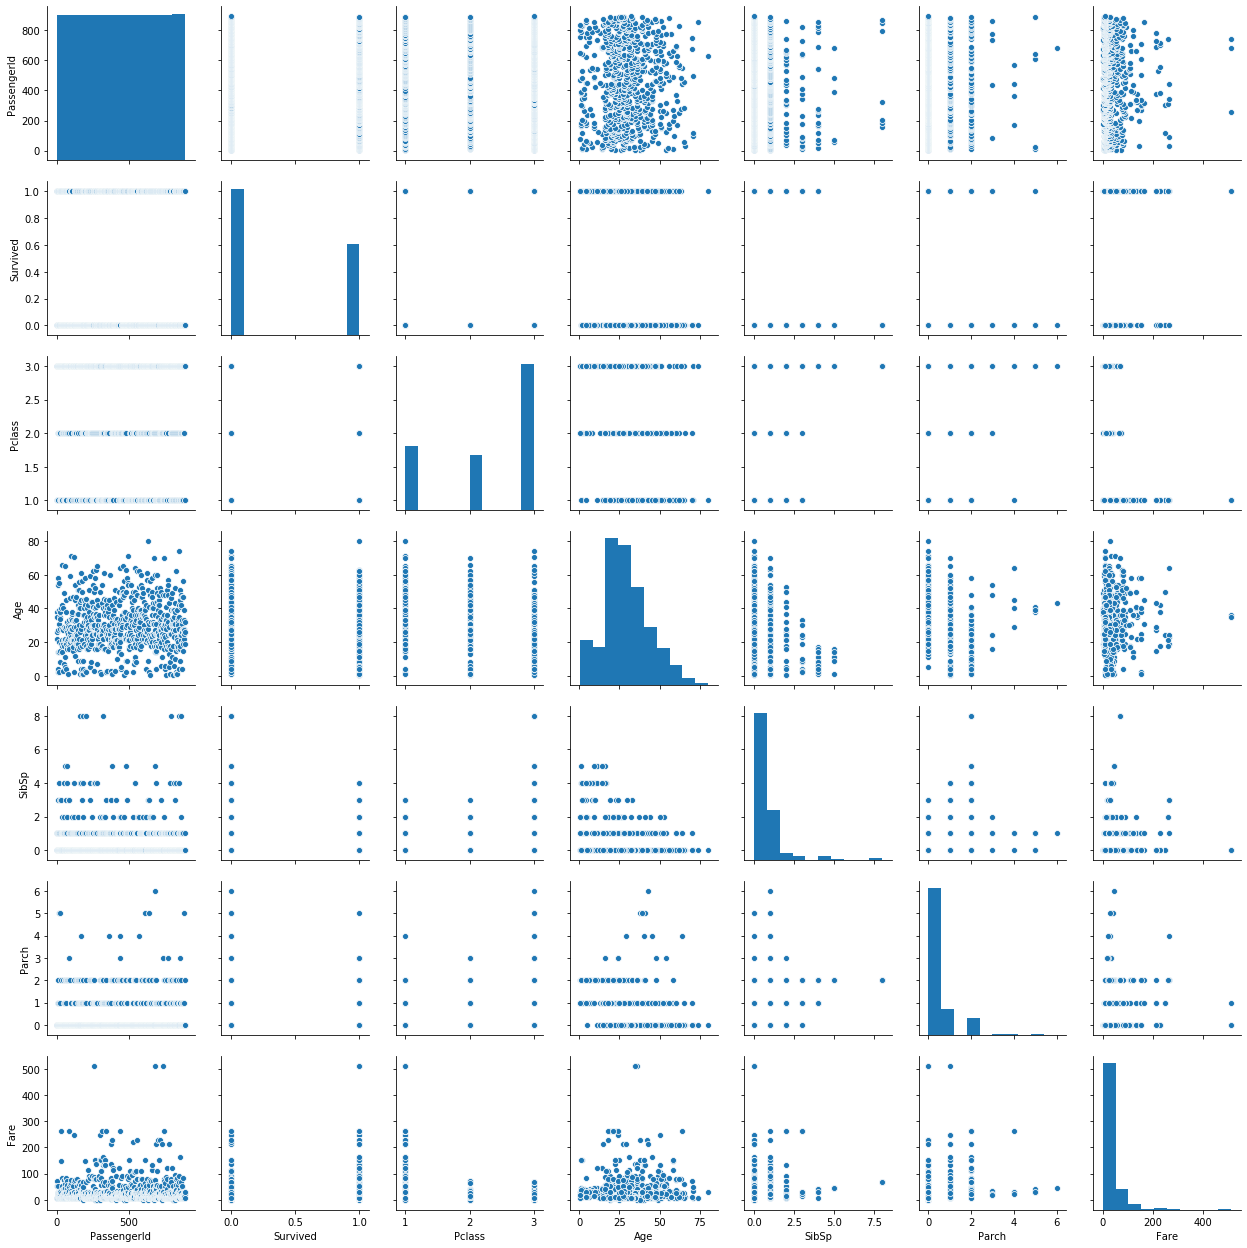

In [94]:
sns.pairplot(train);

Отдельно посмотрим долю выживших в зависимости от пола.Можно видеть, что доля выживших среди женщин значительно  выше: 75% выживших среди женщин против 19% среди мужчин

Text(0.5, 1.0, 'Survived (female)')

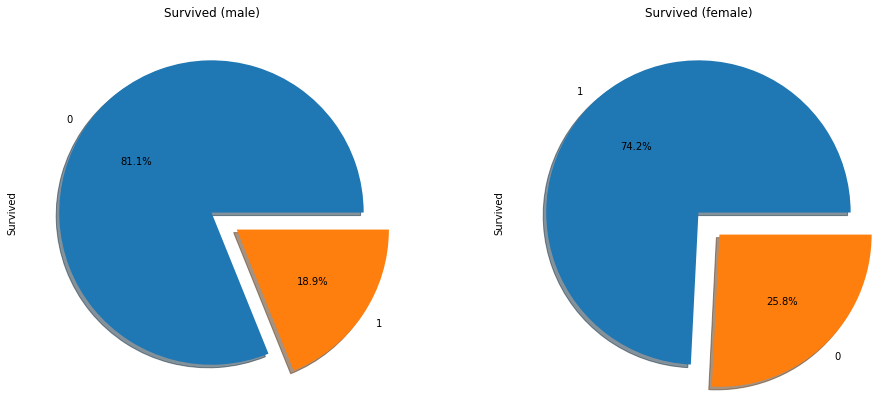

In [96]:
f,ax=plt.subplots(1,2,figsize=(16,7))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

Посмотрим на распределение выживших относительно класса. Можем видеть, что доля выживших в первом классе выше, чем в остальных. Самая большая доля погибших - в третьем классе.

In [99]:
pd.crosstab(train.Pclass, train.Survived, margins=True)

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

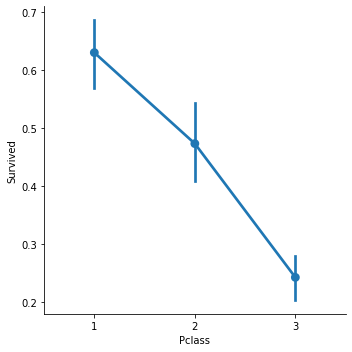

In [101]:
sns.catplot('Pclass','Survived', kind='point', data=train);

Доля выживших женщин в 1 и 2 классе значительно вышы доли погибших, можно сказать, что практически все женщины из 2 и 3 класса выжили. Для 3 класса половина жинщин выжило. Для мужчин доля выживших меньше доля погибших дл всех классов.

In [103]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

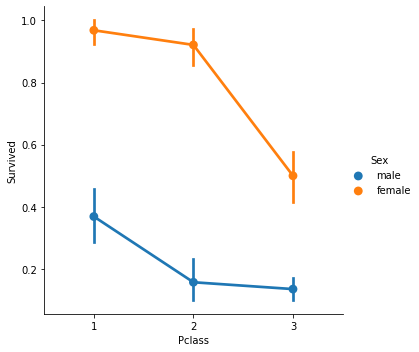

In [146]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=train);

Доля выживших среди места отправки выше среди класса C

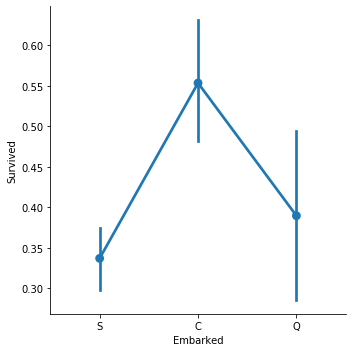

In [104]:
sns.catplot('Embarked','Survived', kind='point', data=train);

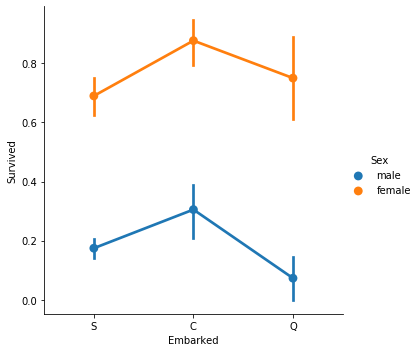

In [105]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=train);

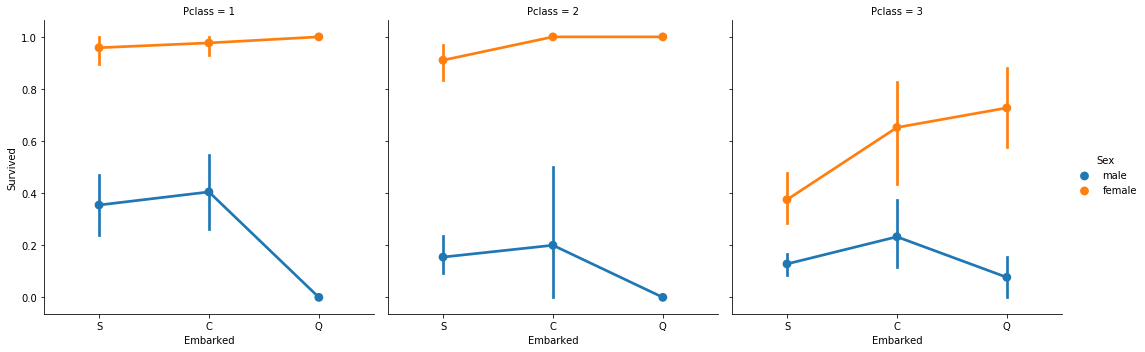

In [143]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=train);

Почему класс C имел больший процент выживаемости? Посмотрим на среднее значение класса для C:

In [111]:
train.groupby(['Embarked'])['Pclass'].mean()

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64

Можем видеть, что в основном это были представители 1 класса, у которых процент выживаемости был выше.

In [179]:
pd.crosstab([train.Embarked, train.Pclass], train.Sex, margins=True)

Sex              female  male  All
Embarked Pclass                   
C        1           43    42   85
         2            7    10   17
         3           23    43   66
Q        1            1     1    2
         2            2     1    3
         3           33    39   72
S        1           48    79  127
         2           67    97  164
         3           88   265  353
All                 312   577  889

Посмотрим на распределение возраста. Все пассажири были достаточно молодыми, в основном между 20 и 40 годами. 

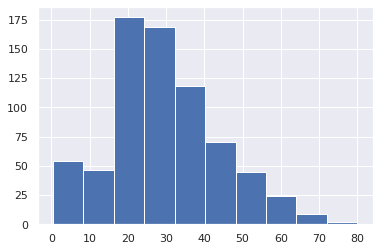

In [221]:
train.Age.hist();

In [12]:
df.loc[~df['Age'].isnull(),'Age'] = df.loc[~df['Age'].isnull(),'Age'].astype('int')

Разделим данные на возрастные группы

In [13]:
for df in [train, test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = int(i)

In [14]:
df_toplot = train[['Sex','Survived','Age_bin','Pclass']]

In [15]:
df_toplot['Age_bin'].fillna(0,inplace=True)

/home/vika/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
df_toplot['Age_bin'] = df_toplot['Age_bin'].astype('int')

/home/vika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.1.1


Посотрим на доли выживших в зависимости от возраста. Интересно, что наиболее высокая доля выживаемости имели мужчины межд 40 и 50 годами. Возможно в этой группе просто было выше представителей 1 класса

/home/vika/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


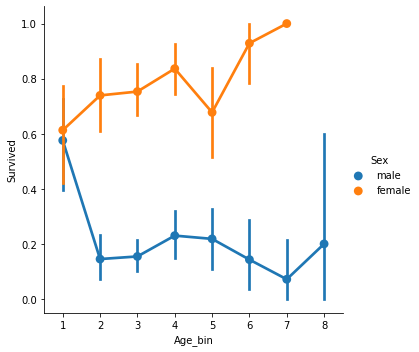

In [18]:
sns.factorplot('Age_bin','Survived',hue='Sex',kind='point',data=df_toplot, order=[1, 2, 3, 4, 5,6,7,8])

In [41]:
train[train['Sex'] == 'male']['Age_bin'].value_counts(normalize=True)

3.0    0.328918
4.0    0.220751
2.0    0.152318
5.0    0.121413
1.0    0.072848
6.0    0.061810
7.0    0.030905
8.0    0.011038
Name: Age_bin, dtype: float64

Можем видеть, что наше предположение частично подтвердилось: мужчин 30-40 лет было больше в 3 классе, однако те мужчины в 1 классе 30-40 лет имели действительно наиболий высокий процент выживаемости, чем для других возрастных группах в других класса. Например, во втором классе, практически все мужчины из любой возрастной группы погибли

In [54]:
pd.crosstab(train[train['Sex'] == 'male'].Pclass, train[train['Sex'] == 'male'].Age_bin, normalize='columns')

Age_bin       1.0       2.0       3.0   4.0       5.0       6.0       7.0  8.0
Pclass                                                                        
1        0.060606  0.072464  0.127517  0.25  0.436364  0.500000  0.642857  0.6
2        0.272727  0.144928  0.221477  0.26  0.163636  0.321429  0.214286  0.0
3        0.666667  0.782609  0.651007  0.49  0.400000  0.178571  0.142857  0.4

In [59]:
pd.crosstab([train[train['Sex'] == 'male'].Pclass,train[train['Sex'] == 'male'].Survived], train[train['Sex'] == 'male'].Age_bin)

Age_bin          1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0
Pclass Survived                                        
1      0           0    3   10   12   15   10    9    2
       1           2    2    9   13    9    4    0    1
2      0           0    9   33   23    8    9    2    0
       1           9    1    0    3    1    0    1    0
3      0          14   47   83   42   20    5    2    2
       1           8    7   14    7    2    0    0    0

Для женщин ситуация похожая - больше всего выживало в 1 и 2 классе. В основном погибшие женщины были из третьего класса.

In [52]:
pd.crosstab(train[train['Sex'] == 'female'].Pclass, train[train['Sex'] == 'female'].Age_bin, normalize='columns')

Age_bin       1.0       2.0       3.0       4.0       5.0       6.0       7.0
Pclass                                                                       
1        0.032258  0.282609  0.259259  0.436364  0.419355  0.785714  0.666667
2        0.258065  0.173913  0.345679  0.309091  0.322581  0.214286  0.000000
3        0.709677  0.543478  0.395062  0.254545  0.258065  0.000000  0.333333

In [60]:
pd.crosstab([train[train['Sex'] == 'female'].Pclass,train[train['Sex'] == 'female'].Survived], train[train['Sex'] == 'female'].Age_bin)

Age_bin          1.0  2.0  3.0  4.0  5.0  6.0  7.0
Pclass Survived                                   
1      0           1    0    1    0    1    0    0
       1           0   13   20   24   12   11    2
2      0           0    0    3    1    1    1    0
       1           8    8   25   16    9    2    0
3      0          11   12   16    8    8    0    0
       1          11   13   16    6    0    0    1

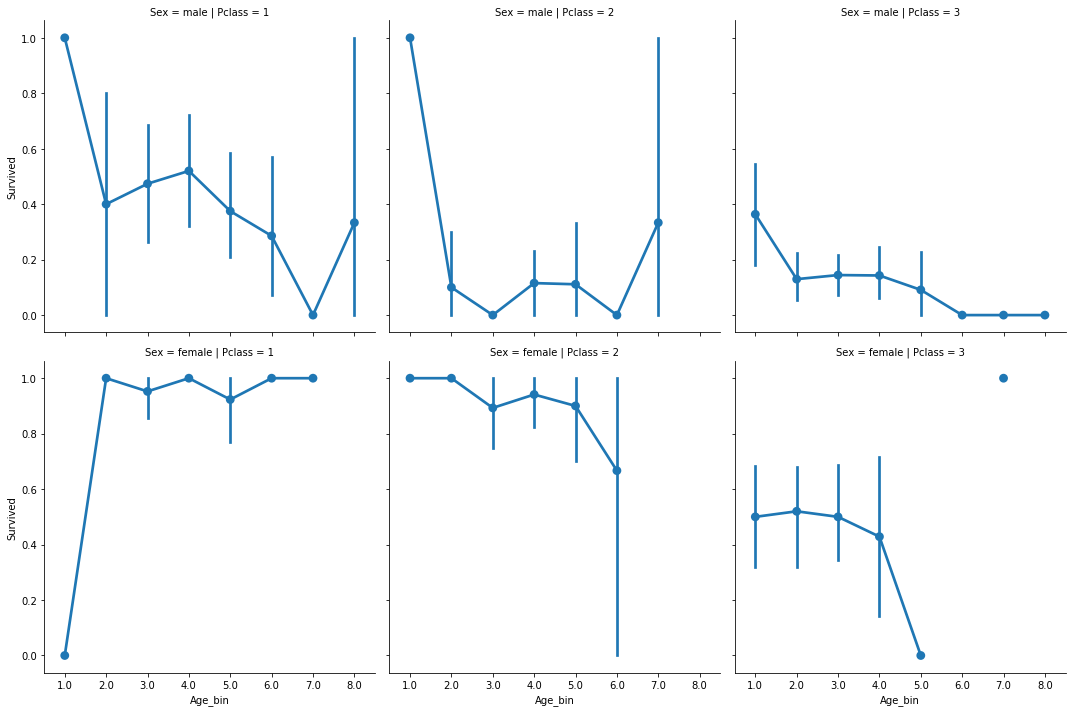

In [20]:
sns.catplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=train);

In [22]:
sns.set()

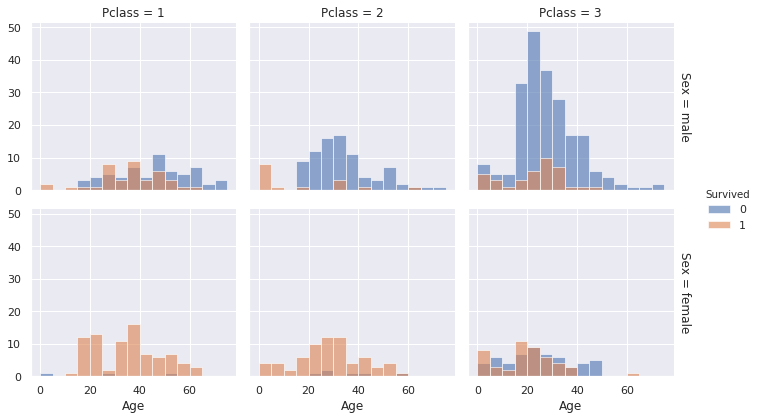

In [23]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show() 

По картинке можем видеть, что большинство выживших - из 1 и 2 класса.

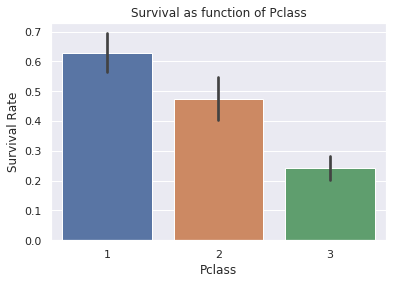

In [24]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

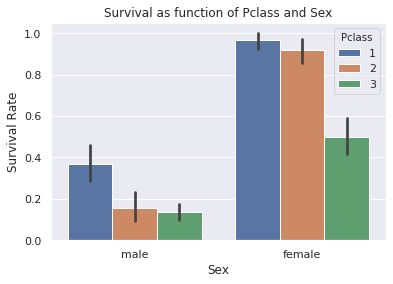

In [25]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

Можем видеть, что в пункте отправки C и возраст и цена была выше. Что, как мы уже выяснили, объясняется тем, что в основном там был 1 класс

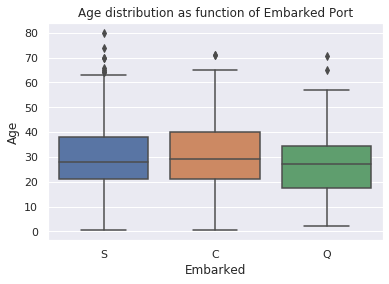

In [26]:
sns.boxplot(x='Embarked', y='Age', data=train)
plt.title("Age distribution as function of Embarked Port")
plt.show()

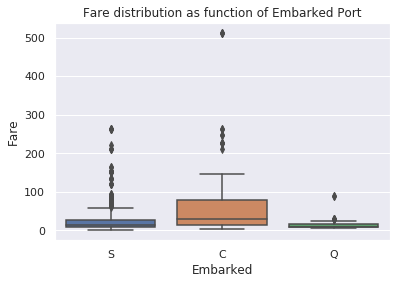

In [28]:
sns.boxplot(x='Embarked', y='Fare', data=train)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

In [31]:
cm_surv = ["darkgrey" , "lightgreen"]

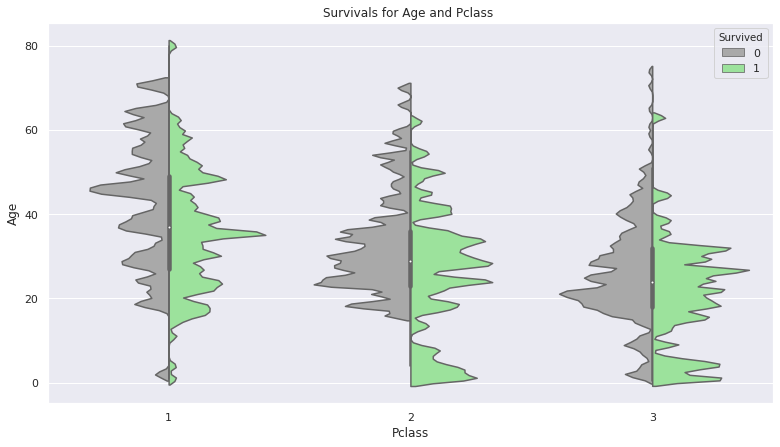

In [33]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=train, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

Распределение Fare далеко от нормального, попробуем приблизить его к нормальному.


 mu = 32.20 and sigma = 49.67



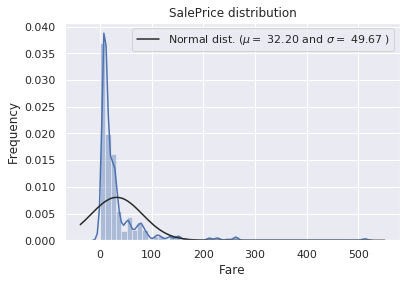

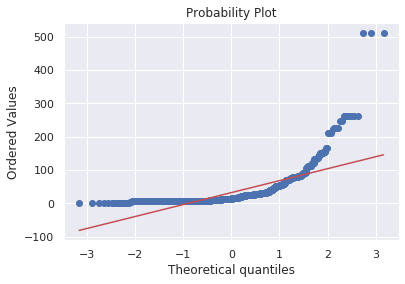

In [62]:
sns.distplot(train['Fare'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Fare'], plot=plt)
plt.show()

In [63]:
train["Fare"] = np.log1p(train["Fare"])


 mu = 2.96 and sigma = 0.97



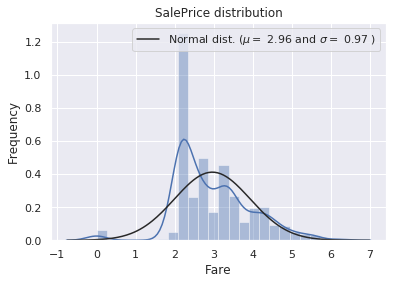

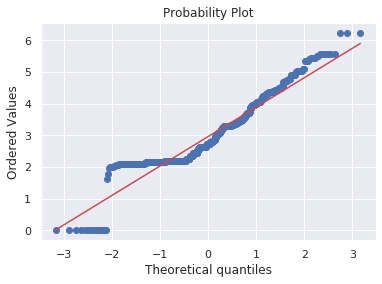

In [64]:
sns.distplot(train['Fare'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Fare'], plot=plt)
plt.show()

## Очистка и подготовка данных.

In [84]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Survived.values
all_data = pd.concat((train, test), sort=True).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 12)


In [85]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
Cabin         77.463713
Age_bin       20.091673
Age           20.091673
Embarked       0.152788
Fare           0.076394

Text(0.5, 1.0, 'Percent missing data by feature')

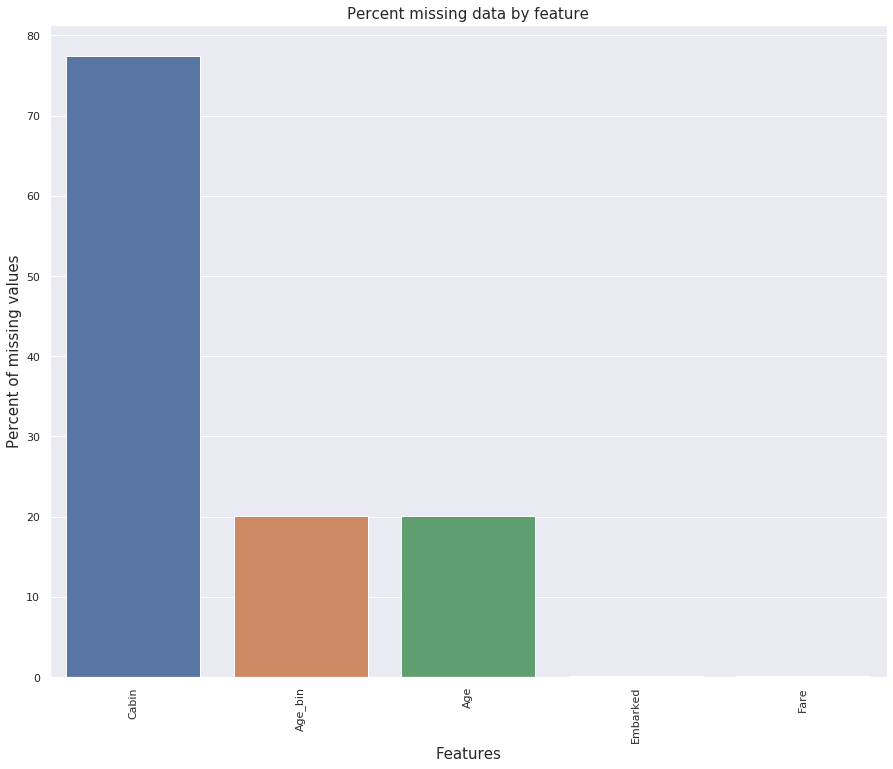

In [86]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

В целом, в датасете немного пропущенных значений. Основные - номер кабины. Избавимся от этого столбца

In [87]:
all_data.drop('Cabin', axis=1, inplace=True)

Также удалим столбец имя

In [88]:
all_data.drop('Name', axis=1, inplace=True)

Возраст и остальные пропуски заполним средним значением

In [89]:
all_data.fillna(all_data.mean(), inplace=True)

Можем видеть, что цена и класс отрицательно скоррелированы.SibSp и Parch также положительно скореллированы.

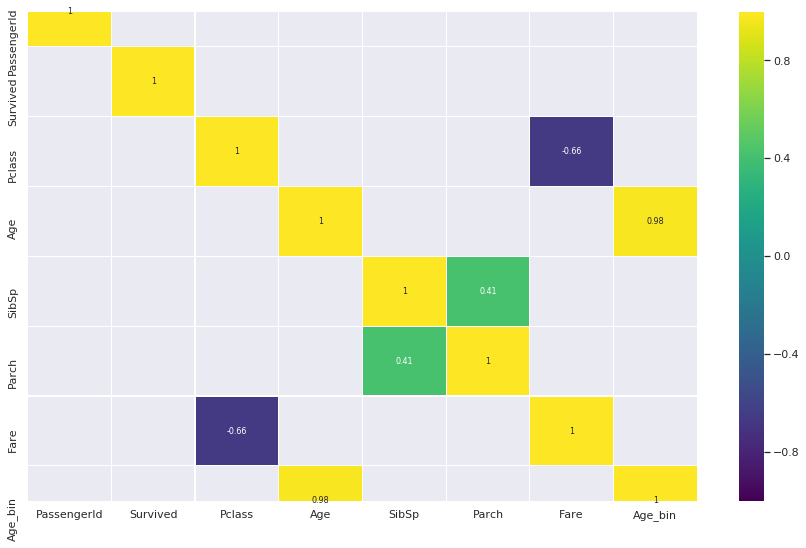

In [73]:
corrmat = train.corr()
plt.subplots(figsize=(15,9))
sns.heatmap(corrmat[(corrmat >= 0.4) | (corrmat < -0.4)], 
            cmap='viridis',
            vmax=1.0, vmin=-1.0,
            linewidth=0.1,
            annot=True,
            annot_kws={"size":8});

### Преобразование в категориальные признаки

In [81]:
[c for c in all_data.columns if all_data[c].dtype =='object']

['Embarked', 'Sex', 'Ticket']

In [82]:
from sklearn.preprocessing import LabelEncoder

cols = ('Embarked',  'Sex', 'Ticket')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (1309, 10)


In [93]:
all_data

Age   Age_bin        Fare  Parch  PassengerId  SibSp  \
0     22.000000  3.000000    2.110213      0            1      1   
1     38.000000  4.000000    4.280593      0            2      1   
2     26.000000  3.000000    2.188856      0            3      0   
3     35.000000  4.000000    3.990834      0            4      1   
4     35.000000  4.000000    2.202765      0            5      0   
...         ...       ...         ...    ...          ...    ...   
1304  29.871099  3.441683    8.050000      0         1305      0   
1305  39.000000  4.000000  108.900000      0         1306      0   
1306  38.000000  4.000000    7.250000      0         1307      0   
1307  29.871099  3.441683    8.050000      0         1308      0   
1308  29.871099  3.441683   22.358300      1         1309      1   

                  Ticket  Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3  
0              A/5 21171         1           0           1         0         1  
1               PC 17599         0           0           0         0         0  
2       STON/O2. 3101282         0           0           1         0         1  
3                 113803         0           0           1         0         0  
4                 373450         1           0           1         0         1  
...                  ...       ...         ...         ...       ...       ...  
1304           A.5. 3236         1           0           1         0         1  
1305            PC 17758         0           0           0         0         0  
1306  SOTON/O.Q. 3101262         1           0           1         0         1  
1307              359309         1           0           1         0         1  
1308                2668         1           0           0         0         1  

[1309 rows x 12 columns]

In [94]:
all_data = pd.get_dummies(all_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)


KeyError: "None of [Index(['Sex', 'Embarked', 'Pclass'], dtype='object')] are in the [columns]"

In [95]:
all_data.drop(['Ticket',],axis=1,inplace=True)
all_data.dropna(inplace=True)

Признаки со смещенным распределением

In [98]:
all_data.drop(['PassengerId','Age_bin'],axis=1,inplace=True)

In [99]:
all_data

Age        Fare  Parch  SibSp  Sex_male  Embarked_Q  Embarked_S  \
0     22.000000    2.110213      0      1         1           0           1   
1     38.000000    4.280593      0      1         0           0           0   
2     26.000000    2.188856      0      0         0           0           1   
3     35.000000    3.990834      0      1         0           0           1   
4     35.000000    2.202765      0      0         1           0           1   
...         ...         ...    ...    ...       ...         ...         ...   
1304  29.871099    8.050000      0      0         1           0           1   
1305  39.000000  108.900000      0      0         0           0           0   
1306  38.000000    7.250000      0      0         1           0           1   
1307  29.871099    8.050000      0      0         1           0           1   
1308  29.871099   22.358300      1      1         1           0           0   

      Pclass_2  Pclass_3  
0            0         1  
1            0         0  
2            0         1  
3            0         0  
4            0         1  
...        ...       ...  
1304         0         1  
1305         0         0  
1306         0         1  
1307         0         1  
1308         0         1  

[1309 rows x 9 columns]

In [100]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
Fare        6.359058
SibSp       3.839814
Parch       3.664872
Embarked_Q  2.783161
Pclass_2    1.412106
Age         0.453127
Pclass_3   -0.167120
Sex_male   -0.601499
Embarked_S -0.863765

In [101]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

There are 9 skewed numerical features to Box Cox transform


In [102]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
Embarked_Q  2.783161
Fare        2.104092
Parch       1.915617
SibSp       1.835541
Pclass_2    1.412106
Pclass_3   -0.167120
Sex_male   -0.601499
Embarked_S -0.863765
Age        -1.855310

In [103]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## Экзаменационные вопросы:

* EDA, её назначение и типовая структура